Take home 2: Relax Inc
===================

Python Libraries Imported:
======================

In [1]:
# View code for python library imports

import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots_adjust
import sklearn
%matplotlib inline

from datetime import datetime
from datetime import timedelta
import seaborn as sns
import json
from pandas.io.json import json_normalize
import datetime
plt.style.use('ggplot')

from pylab import *
import time
from datetime import datetime
from dateutil import parser
sns.set_context("poster")

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

Part 1 ‑ Exploratory data analysis
===========================
* Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period , identify which factors predict future user adoption .

In [2]:
# Data
User_Engagement = pd.read_csv(r'C:\Users\paro\Desktop\Relax_Inc\takehome_user_engagement.csv')
Users = pd.read_csv(r'C:\Users\paro\Desktop\Relax_Inc\takehome_users.csv', encoding='latin1')

## Data Structure with info, shape and len methods

In [3]:
# Number of records (Range Index) and fields (Data Columns) in each record with datatypes, and non-null values.
User_Engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
# Count of rows and columns in User_Engagement table.

# Using the .shape[index] method
row_count = User_Engagement.shape[0] # 0 for row
column_count = User_Engagement.shape[1] # 1 for column

print("Number of rows in this dataframe:", row_count)
print("Number of columns in this dataframe:", column_count)

Number of rows in this dataframe: 207917
Number of columns in this dataframe: 3


In [6]:
# Count of rows and columns in Users table.

# Using the .shape[index] method
row_count = Users.shape[0] # 0 for row
column_count = Users.shape[1] # 1 for column

print("Number of rows in this dataframe:", row_count)
print("Number of columns in this dataframe:", column_count)

Number of rows in this dataframe: 12000
Number of columns in this dataframe: 10


In [7]:
# Number of rows and columns using the .len(df.axes[index]) method
total_rows=len(logins.axes[0]) # 0 for row
total_cols=len(logins.axes[1]) # 1 for column

print("Number of rows in this dataframe:", total_rows)
print("Number of columns in this dataframe:", total_cols)

NameError: name 'logins' is not defined

In [8]:
# Looking at a random sample of the dataframe
User_Engagement.sample(5)

,time_stamp,user_id,visited
15268,2014-01-17 22:49:52,906,1
201427,2014-02-17 09:16:29,11479,1
79283,2014-05-19 23:54:02,4414,1
180466,2014-05-29 21:16:54,10222,1
191960,2014-01-03 00:27:24,10866,1


In [9]:
# Looking at a random sample of the dataframe
Users.sample(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
4522,4523,2013-11-09 15:19:41,Foerster Katharina,KatharinaFoerster@gustr.com,GUEST_INVITE,1.384183e+09,0,0,208,8923.0
9558,9559,2013-02-23 05:23:35,Burdekin Imogen,ImogenBurdekin@hotmail.com,ORG_INVITE,1.401687e+09,1,0,101,7630.0
3510,3511,2013-12-03 19:04:00,Miller Jay,JayMiller@gmail.com,SIGNUP_GOOGLE_AUTH,1.386097e+09,0,0,19,NaN
9688,9689,2013-08-03 03:16:28,Bowe Ruby,RubyBowe@gmail.com,ORG_INVITE,1.375500e+09,0,0,62,6171.0
3178,3179,2014-02-10 08:50:57,Laursen Frederikke,FrederikkeOLaursen@gmail.com,SIGNUP_GOOGLE_AUTH,1.392886e+09,1,0,277,NaN


## Basic summary statistics with count of null, minimum, maximum, and unique values where appropriate.

In [10]:
# Basic summary statistics with count of null, minimum, maximum, and unique values where appropriate.
User_Engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [11]:
Users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [12]:
# number of unique values in each field
User_Engagement.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

In [13]:
# number of unique values in each field
Users.nunique()

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
dtype: int64

In [14]:
#Checking for NaN values in the dataframe columns / fields
User_Engagement.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [15]:
#Checking for NaN values in the dataframe columns / fields
Users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [16]:
User_Engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [17]:
Users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [18]:
# Convert dates to datetime objects
from datetime import datetime
from datetime import timedelta
User_Engagement['time_stamp'] = list(map(lambda x: datetime.strptime(x.split()[0],'%Y-%m-%d'), User_Engagement['time_stamp']))

In [19]:
User_Engagement.head()

,time_stamp,user_id,visited
0,2014-04-22,1,1
1,2013-11-15,2,1
2,2013-11-29,2,1
3,2013-12-09,2,1
4,2013-12-25,2,1


In [20]:
print("First Time Stamp:",User_Engagement['time_stamp'].min())
print("Last Time Stamp:",User_Engagement['time_stamp'].max())

First Time Stamp: 2012-05-31 00:00:00
Last Time Stamp: 2014-06-06 00:00:00


In [21]:
User_Engagement_Separated=pd.DataFrame(User_Engagement['user_id'].value_counts())
User_Engagement_Separated.reset_index(inplace=True)
User_Engagement_Separated.columns=['User_ID','Number of Visits']
User_Engagement_Separated.head()

,User_ID,Number of Visits
0,3623,606
1,906,600
2,1811,593
3,7590,590
4,8068,585


In [22]:
Users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [23]:
# Convert dates to datetime objects
from datetime import datetime
from datetime import timedelta
Users['creation_time'] = list(map(lambda x: datetime.strptime(x.split()[0],'%Y-%m-%d'), Users['creation_time']))

In [24]:
print("First Time Stamp:",Users['creation_time'].min())
print("Last Time Stamp:",Users['creation_time'].max())

First Time Stamp: 2012-05-31 00:00:00
Last Time Stamp: 2014-05-30 00:00:00


In [25]:
print("Unique user id's: ", len(Users['object_id'].unique()))
print("Unique user names: ", len(Users['name'].unique()))
print("Unique emails: ", len(Users['email'].unique()))

Unique user id's:  12000
Unique user names:  11355
Unique emails:  11980


## Data Visualization

Text(0,0.5,'Number of Unique Users')

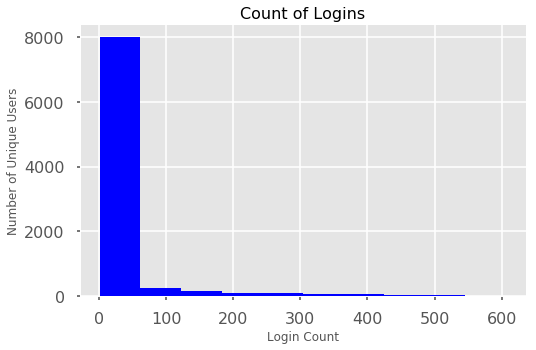

In [26]:
plt.figure(figsize=(8,5))
plt.hist(User_Engagement.groupby('user_id').size(), bins=10, color ='b')
plt.title('Count of Logins', fontsize = 16)
plt.xlabel('Login Count', fontsize = 12)
plt.ylabel('Number of Unique Users', fontsize = 12)

Text(0,0.5,'Number of Unique Users')

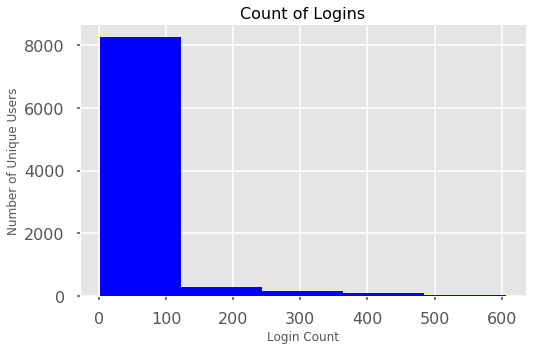

In [27]:
plt.figure(figsize=(8,5))
plt.hist(User_Engagement.groupby('user_id').size(), bins=5, color ='b')
plt.title('Count of Logins', fontsize = 16)
plt.xlabel('Login Count', fontsize = 12)
plt.ylabel('Number of Unique Users', fontsize = 12)

Text(0,0.5,'Number of Unique Users')

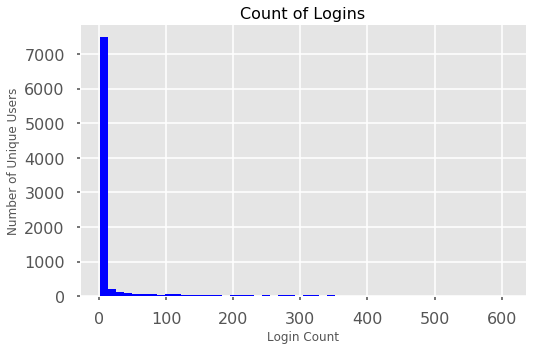

In [28]:
plt.figure(figsize=(8,5))
plt.hist(User_Engagement.groupby('user_id').size(), bins=50, color ='b')
plt.title('Count of Logins', fontsize = 16)
plt.xlabel('Login Count', fontsize = 12)
plt.ylabel('Number of Unique Users', fontsize = 12)

Text(0,0.5,'Number of Unique Users')

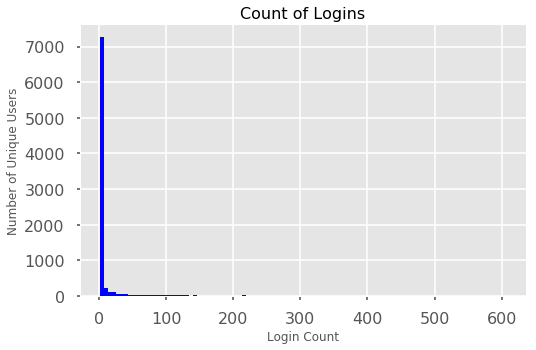

In [29]:
plt.figure(figsize=(8,5))
plt.hist(User_Engagement.groupby('user_id').size(), bins=100, color ='b')
plt.title('Count of Logins', fontsize = 16)
plt.xlabel('Login Count', fontsize = 12)
plt.ylabel('Number of Unique Users', fontsize = 12)

In [30]:
#skewness
skew_ = User_Engagement.skew()
skew_

user_id    0.030635
visited    0.000000
dtype: float64

## Imbalanced Data

* There are 12,000 unique users who signed up in th elast two years.
* There are 11355 unique user names and 11980 unique email addresses implying many individuals with duplicate names. 
* The histogram is heavily right skewed shows that a majority of the users have logged in less than 50 times. 
* Many users actively logged in up to a hundred times. The maximum number of logins was little over 600 times.

# Logins & Adopted Users:
* Adopted Users are users who logged in more than 3 days in a week.

In [31]:
count_of_engagements = {}

#Loop over each row to get number of logins
for index,row in User_Engagement.iterrows():
    if row['user_id'] in count_of_engagements:
        count_of_engagements[row['user_id']] += 1
    else:
        count_of_engagements[row['user_id']] = 1

#Convert to dataframe
counts = pd.DataFrame.from_dict(count_of_engagements, orient='index')
counts.columns= ['visit_count']
counts = counts.reset_index(drop=False)
counts.columns=['user_id', 'visit_count']

In [32]:
#Create time difference column for Users dataframe

Users['last_session_creation_time'] = pd.to_datetime(Users['last_session_creation_time'], unit='s')
Users['creation_time'] = pd.to_datetime(Users['creation_time'])

Users['creation_time_difference'] = Users['last_session_creation_time'].sub(Users['creation_time'], axis=0)
Users.rename(columns={'object_id': 'user_id'}, inplace=True)
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
user_id                       12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
creation_time_difference      8823 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(3), timedelta64[ns](1)
memory usage: 1.0+ MB


In [33]:
# Merging datasets
final_df = Users.merge(counts, how='left', on='user_id')
final_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_difference,visit_count
0,1,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0 days 03:53:30,1.0
1,2,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136 days 03:45:04,14.0
2,3,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0 days 23:14:52,1.0
3,4,2013-05-21,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1 days 08:09:28,1.0
4,5,2013-01-17,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5 days 10:14:20,1.0


In [34]:
#Adopted users
final_df['adopted_user'] = ((final_df['visit_count'] > 3) & (final_df['creation_time_difference'] > np.timedelta64(7,'D')))
final_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_difference,visit_count,adopted_user
0,1,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0 days 03:53:30,1.0,False
1,2,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136 days 03:45:04,14.0,True
2,3,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0 days 23:14:52,1.0,False
3,4,2013-05-21,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1 days 08:09:28,1.0,False
4,5,2013-01-17,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5 days 10:14:20,1.0,False


In [35]:
adopt_perc = len(final_df[final_df['adopted_user'] == True]) / len(final_df)
print(adopt_perc)

0.16725


## Data Visualization

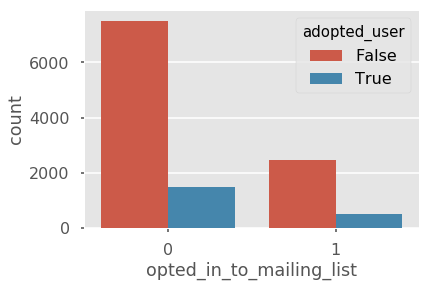

In [36]:
#Analysis of adopted user and whether they opted into marketing emails
ax = sns.countplot(x='opted_in_to_mailing_list', hue='adopted_user', data=final_df)

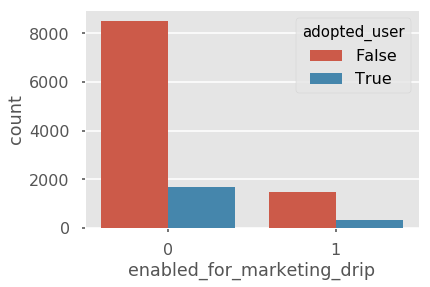

In [37]:
#Analysis of adopted users with regular promotional marketing email
ax = sns.countplot(x='enabled_for_marketing_drip', hue='adopted_user', data=final_df)

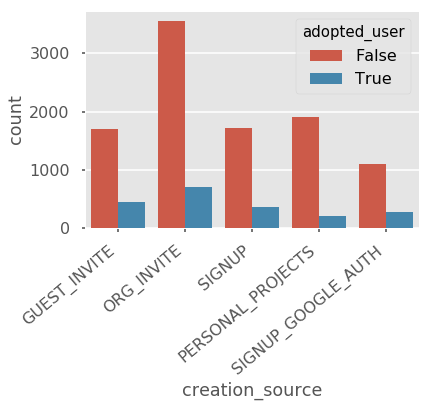

In [38]:
ax = sns.countplot(x='creation_source', hue='adopted_user', data=final_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

# Conclusion: Identifying factors affecting User adoption
* 16.7% users were adopted users per the above definitions of having logged in more than 3 times in a week.
* Invitation to the organization as a guest is the most successful way to convert a nuser to an adopted user.
* Marketing emails did not make a difference in conversion of users to adopted users.